In [1]:

from google.colab import drive 
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

df = pd.read_csv('gdrive/My Drive/Colab Notebooks/NLP/cyberbullying_tweets.csv')

In [3]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [4]:
tweet_text = df.tweet_text.apply(gensim.utils.simple_preprocess)


In [5]:
tweet_text

0        [in, other, words, katandandre, your, food, wa...
1        [why, is, aussietv, so, white, mkr, theblock, ...
2        [xochitlsuckkks, classy, whore, or, more, red,...
3        [jason_gio, meh, thanks, for, the, heads, up, ...
4        [rudhoeenglish, this, is, an, isis, account, p...
                               ...                        
47687    [black, ppl, aren, expected, to, do, anything,...
47688    [turner, did, not, withhold, his, disappointme...
47689    [swear, to, god, this, dumb, nigger, bitch, ha...
47690    [yea, fuck, you, rt, therealexel, if, youre, n...
47691    [bro, gotta, chill, rt, chillshrammy, dog, fuc...
Name: tweet_text, Length: 47692, dtype: object

In [6]:
tweet_text.iloc[0]

['in',
 'other',
 'words',
 'katandandre',
 'your',
 'food',
 'was',
 'crapilicious',
 'mkr']

In [7]:
df.tweet_text.loc[0]

'In other words #katandandre, your food was crapilicious! #mkr'

In [8]:
model = Word2Vec(tweet_text,size=100,window=5,min_count=5,sg=1)

In [9]:
model.wv.most_similar('food')

[('chicken', 0.8450980186462402),
 ('katandandre', 0.8366782069206238),
 ('pair', 0.8166080713272095),
 ('dessert', 0.8075152039527893),
 ('bimbos', 0.7994446754455566),
 ('tvweekmag', 0.7988563179969788),
 ('vicky', 0.7972800135612488),
 ('breakfast', 0.7949931621551514),
 ('contestants', 0.7948821187019348),
 ('table', 0.791415274143219)]

In [10]:
len(df.index)

47692

In [12]:
model.wv.similarity(w1="food",w2="chicken")

0.845098

In [13]:
model.wv.similarity(w1="good",w2="dumb")

0.3432127

In [14]:
model.wv.most_similar('racist')

[('homophobic', 0.7917221188545227),
 ('misogynistic', 0.7589207291603088),
 ('racial', 0.7341041564941406),
 ('ableist', 0.7179802656173706),
 ('apologist', 0.708480954170227),
 ('arent', 0.7072315216064453),
 ('homophobe', 0.7043983936309814),
 ('slurs', 0.7005919218063354),
 ('jew', 0.6951146721839905),
 ('slur', 0.6949174404144287)]

In [15]:
model.wv.most_similar('black')

[('white', 0.7514475584030151),
 ('brown', 0.6523184180259705),
 ('blacks', 0.6436564922332764),
 ('queer', 0.6423754692077637),
 ('straight', 0.6408461928367615),
 ('colored', 0.640455424785614),
 ('hispanic', 0.6397967338562012),
 ('poor', 0.6359555721282959),
 ('cis', 0.6299131512641907),
 ('caucasian', 0.6227221488952637)]

In [16]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


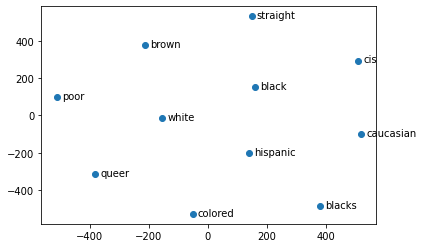

In [17]:
closestwords_tsneplot(model,'black')

In [18]:
model.wv.most_similar('facebook')

[('instagram', 0.856352686882019),
 ('fb', 0.83562833070755),
 ('page', 0.8131678700447083),
 ('insta', 0.8089309930801392),
 ('posts', 0.7720841765403748),
 ('request', 0.7679596543312073),
 ('tl', 0.7634677886962891),
 ('ig', 0.7411431670188904),
 ('curiouscat', 0.7368621230125427),
 ('pics', 0.7256659269332886)]

In [19]:
model.wv.most_similar('religion')

[('ideology', 0.8055968284606934),
 ('islam', 0.7878671288490295),
 ('actions', 0.7822576761245728),
 ('hinduism', 0.78040611743927),
 ('knowledge', 0.7752267718315125),
 ('filth', 0.7738924622535706),
 ('caste', 0.7726553678512573),
 ('organization', 0.7718647718429565),
 ('bigotry', 0.7707860469818115),
 ('rss', 0.7682778239250183)]